In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Damped Oscillation

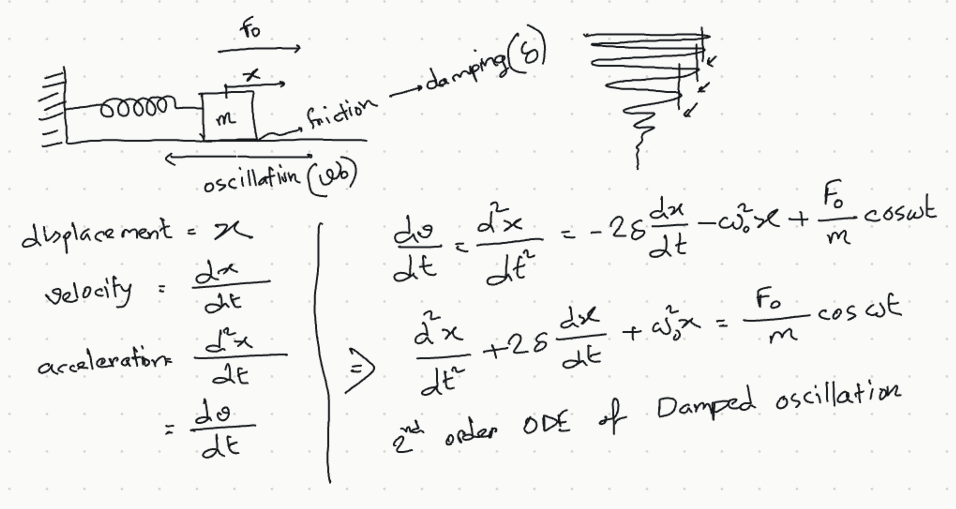

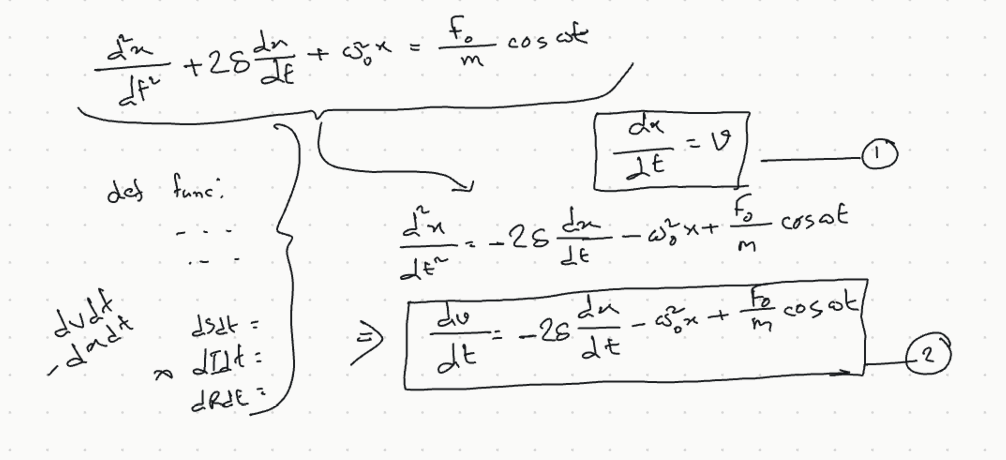

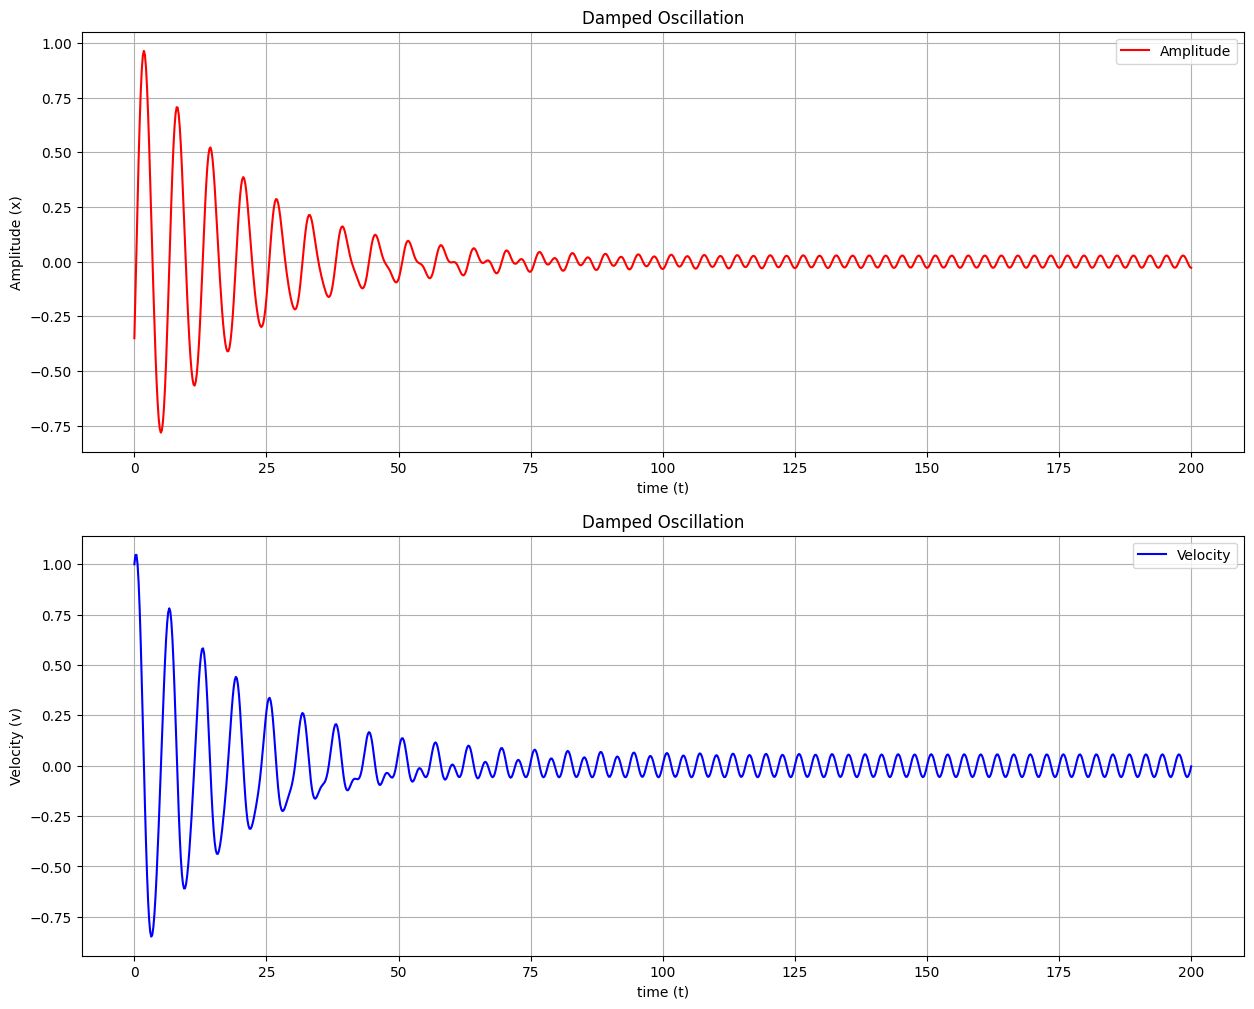

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# define parameters
delta = 0.05
omega = 2.01 # in Hz
omega_0 = 1 # in Hz
F_0 = 1.5 # in N
m = 17.5 # in N or kg

# initial values and time array
t = np.linspace(0, 200, 1001) # in sec
init_val = [-0.35, 1] # in m and m/s

# define func
def damped_osc(X, t):
    x, v = X

    dxdt = v
    dvdt = -2*delta*dxdt - (omega_0**2)*x + (F_0/m)*np.cos(omega*t)

    return [dxdt, dvdt]

# solve
sol = odeint(damped_osc, init_val, t)
x, v = sol.T

plt.figure(figsize=(15, 12))

# plot displacement
plt.subplot(2, 1, 1)
plt.plot(t, x, 'r', label='Amplitude')
plt.xlabel('time (t)')
plt.ylabel('Amplitude (x)')
plt.title('Damped Oscillation')
plt.grid()
plt.legend(loc='best')

# plot velocity
plt.subplot(2, 1, 2)
plt.plot(t, v, 'b', label='Velocity')
plt.xlabel('time (t)')
plt.ylabel('Velocity (v)')
plt.title('Damped Oscillation')
plt.grid()
plt.legend(loc='best')

plt.show()

# Coupled Oscillation

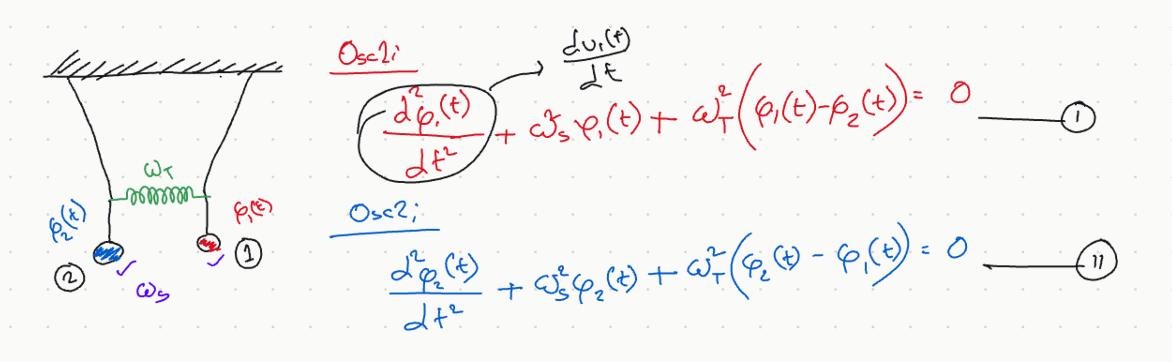

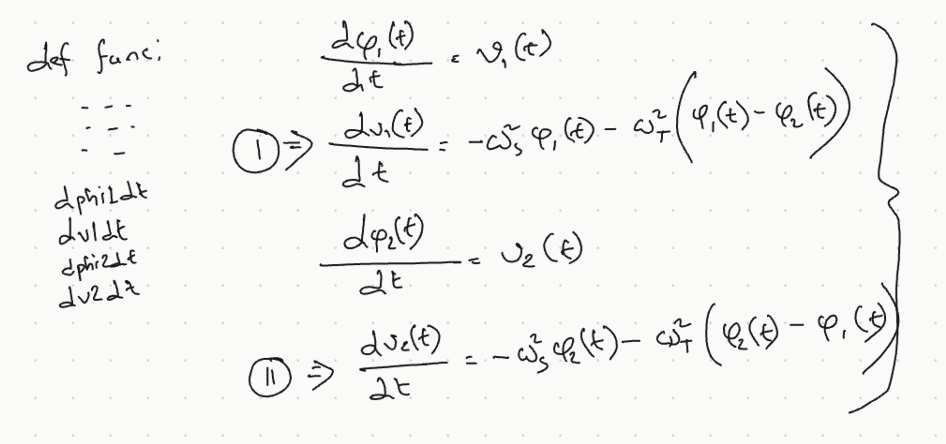

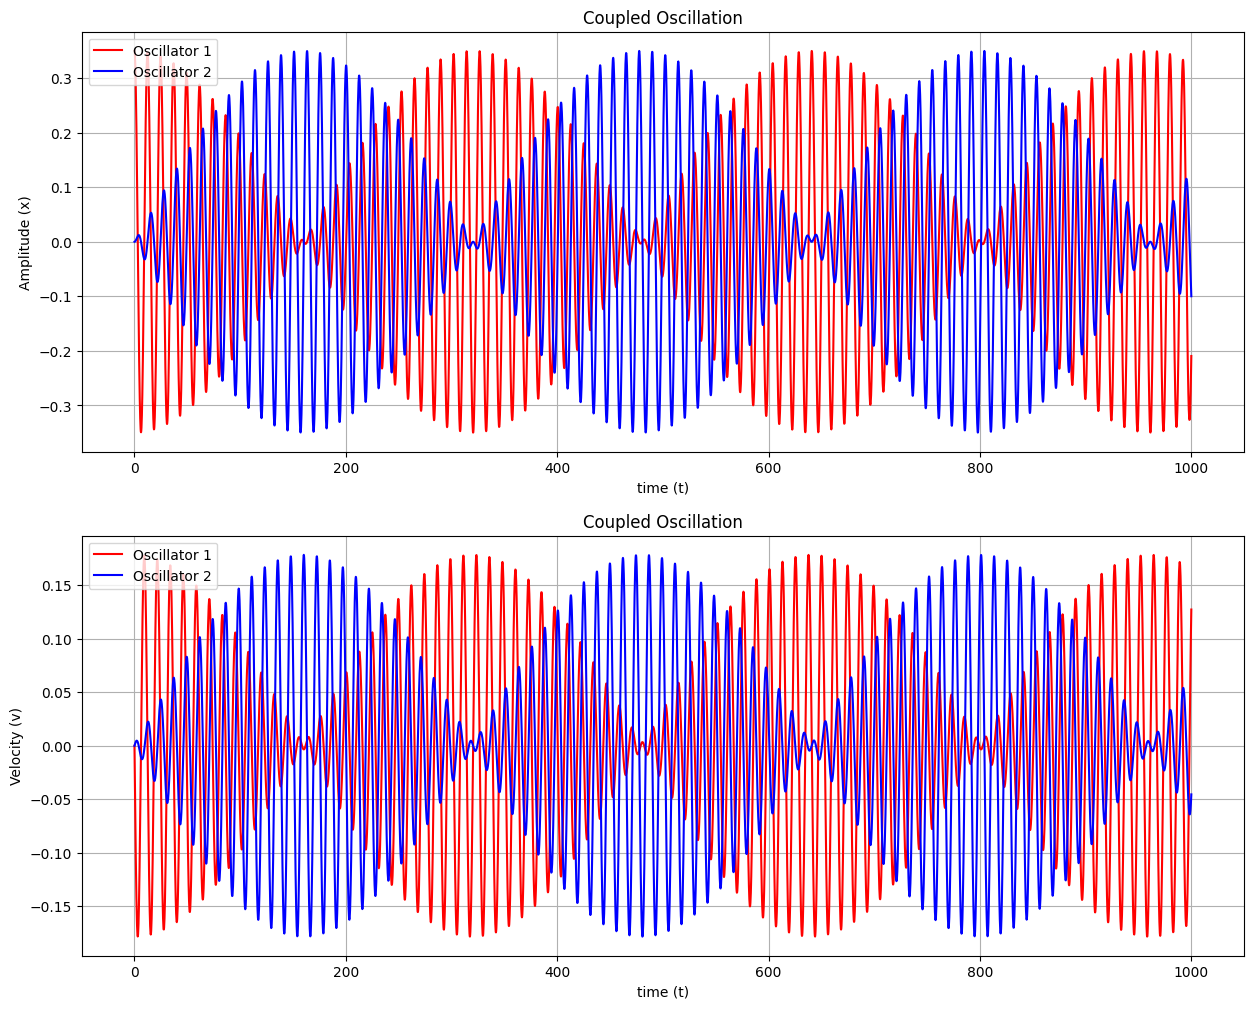

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint


# define parameters
omegaS = 0.5
omegaT = 0.1


# initial values and time array
t = np.linspace(0, 1000, 5001)
init_val = [0.35, 0, 0, 0] # I moved the osc1 0.35 m into the +x axis i.e. phi1 
# at that time v1 = 0, ocs2 was not moved i.e. phi2 = 0, v2 = 0


# define func
def coupled_osc(X, t):
    phi1, v1, phi2, v2 = X

    dphi1dt = v1
    dv1dt = -omegaS**2*phi1 - omegaT**2*(phi1-phi2)
    dphi2dt = v2
    dv2dt = -omegaS**2*phi2 - omegaT**2*(phi2-phi1)

    return [dphi1dt, dv1dt, dphi2dt, dv2dt]


# solve
sol = odeint(coupled_osc, init_val, t)
phi1, v1, phi2, v2 = sol.T



plt.figure(figsize=(15, 12))

# plot displacement
plt.subplot(2, 1, 1)
plt.plot(t, phi1, 'r', label='Oscillator 1')
plt.plot(t, phi2, 'b', label='Oscillator 2')
plt.xlabel('time (t)')
plt.ylabel('Amplitude (x)')
plt.title('Coupled Oscillation')
plt.grid()
plt.legend(loc='best')

# plot velocity
plt.subplot(2, 1, 2)
plt.plot(t, v1, 'r', label='Oscillator 1')
plt.plot(t, v2, 'b', label='Oscillator 2')
plt.xlabel('time (t)')
plt.ylabel('Velocity (v)')
plt.title('Coupled Oscillation')
plt.grid()
plt.legend(loc='best')

plt.show()